<a href="https://colab.research.google.com/github/Peckkie/Experiment_Evaluation_CCA/blob/main/Evaluation_each_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# คำสั่ง  drive.mount : เป็นผูก google drive กับ colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir( '/content/drive/MyDrive/CCA_Project')
!pwd 

/content/drive/MyDrive/CCA_Project


In [7]:
import pandas as pd
RFdf = pd.read_csv( '/content/drive/MyDrive/CCA_Project/result_csv/Testdf_15ABrf.csv')
RFdf.head(3)

,Unnamed: 0,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename,15AB_category,15AB_Prob,15AB_ProbAll,Predict_15AB
0,0,40,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,86.0,133.0,477.0,311.0,0.092664,0.148873,0.513514,0.346614,AB01 P1 C040.JPG,Normal,0.413035,"[0.21054949660106018, 0.15272910155885105, 0.0...",Incorrect
1,1,40,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,163.0,139.0,532.0,385.0,0.171698,0.154849,0.560377,0.428287,AB01 P2 C040.JPG,AB01,0.741650,"[0.741650235419515, 0.07765986354655634, 0.003...",Correct
2,2,40,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,127.0,135.0,605.0,640.0,0.140316,0.150865,0.667984,0.711155,AB01 P4-1 C040.JPG,AB02,0.432403,"[0.34931351731971466, 0.43240273685662617, 0.0...",Incorrect


In [8]:
Suspected_CCA = ['AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083']
Non_Suspected_CCA = ['AB01','AB02','AB03', 'AB04','AB09', 'AB10', 'AB11','AB12']

In [9]:
a_ = RFdf['15AB_category'].tolist()

AI_Predic =[]
for  i in range(len(a_)):
    if a_[i] in Suspected_CCA:
        a = 'SuspectedCCA'
        AI_Predic.append(a)
    elif a_[i] in Non_Suspected_CCA:
        a = 'Non_SuspectedCCA'
        AI_Predic.append(a)
    else:
        a = 'Normal'
        AI_Predic.append(a) 

a_ = RFdf['Sub_class'].tolist()

Act_Predic =[]
for  i in range(len(a_)):
    if a_[i] in Suspected_CCA:
        a = 'SuspectedCCA'
        Act_Predic.append(a)
    elif a_[i] in Non_Suspected_CCA:
        a = 'Non_SuspectedCCA'
        Act_Predic.append(a)
    else:
        a = 'Normal'
        Act_Predic.append(a) 

RFdf['AI_Predic_CCA'] = AI_Predic
RFdf['Act_Predic_CCA'] = Act_Predic

In [14]:
# set(RFdf['Case'])

In [19]:
G_sus = RFdf.groupby(['Case', 'AI_Predic_CCA']).count()
G_sus0 = G_sus.reset_index(level=['Case', 'AI_Predic_CCA'])
G_sus0

,Case,AI_Predic_CCA,Unnamed: 0,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename,15AB_category,15AB_Prob,15AB_ProbAll,Predict_15AB,Act_Predic_CCA
0,1,Non_SuspectedCCA,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
1,1,Normal,27,27,27,27,27,27,27,27,27,27,14,14,14,14,14,14,14,14,14,27,27,27,27,27,27
2,1,SuspectedCCA,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
3,2,Non_SuspectedCCA,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
4,2,Normal,24,24,24,24,24,24,24,24,24,24,12,12,12,12,12,12,12,12,12,24,24,24,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,440,Non_SuspectedCCA,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
203,441,Non_SuspectedCCA,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
204,442,Non_SuspectedCCA,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
205,443,Non_SuspectedCCA,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [60]:
case = list(set(G_sus0['Case']))
result_clas = []
for i in range(len(case)):
    a = G_sus0[G_sus0['Case'] ==case[i]]
    res = set(a.AI_Predic_CCA)
    if len(res) == 1:
        aa = a.AI_Predic_CCA.iloc[0]
        result_clas.append(aa)
    elif res =={'Non_SuspectedCCA', 'Normal', 'SuspectedCCA'}:
        aa = 'SuspectedCCA'
        result_clas.append(aa)
    elif res == {'Non_SuspectedCCA', 'SuspectedCCA'}:
        aa = 'SuspectedCCA'
        result_clas.append(aa)        
    elif res == {'Normal', 'SuspectedCCA'}:
        aa = 'SuspectedCCA'
        result_clas.append(aa)
    elif res == {'Non_SuspectedCCA', 'Normal'}:
        aa = 'Non_SuspectedCCA'       #*********************     
        result_clas.append(aa)

In [61]:
len(result_clas)

144

In [68]:
G_sus = RFdf.groupby(['Case', 'Act_Predic_CCA']).count()
G_sus0 = G_sus.reset_index(level=['Case', 'Act_Predic_CCA'])
case = list(set(G_sus0['Case']))
print(len(case))

144


In [69]:
G_sus = RFdf.groupby(['Case', 'Act_Predic_CCA']).count()
G_sus0 = G_sus.reset_index(level=['Case', 'Act_Predic_CCA'])
case = list(set(G_sus0['Case']))
result_clas_act = []
for i in range(len(case)):
    a = G_sus0[G_sus0['Case'] ==case[i]]
    res = set(a.Act_Predic_CCA)
    if len(res) == 1:
        aa = a.Act_Predic_CCA.iloc[0]
        result_clas_act.append(aa)
    elif res =={'Non_SuspectedCCA', 'Normal', 'SuspectedCCA'}:
        aa = 'SuspectedCCA'
        result_clas_act.append(aa)
    elif res == {'Non_SuspectedCCA', 'SuspectedCCA'}:
        aa = 'SuspectedCCA'
        result_clas_act.append(aa)        
    elif res == {'Normal', 'SuspectedCCA'}:
        aa = 'SuspectedCCA'
        result_clas_act.append(aa)
    elif res == {'Non_SuspectedCCA', 'Normal'}:
        aa = 'Non_SuspectedCCA'       #*********************     
        result_clas_act.append(aa)

In [70]:
len(result_clas_act)

144

In [71]:
#วัดผล 
import numpy as np
from sklearn.metrics import confusion_matrix

act= result_clas_act
pred = result_clas
cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 92.36111111111111%
                  precision    recall  f1-score   support

Non_SuspectedCCA       0.96      0.88      0.92        59
          Normal       0.88      0.94      0.91        53
    SuspectedCCA       0.94      0.97      0.95        32

        accuracy                           0.92       144
       macro avg       0.93      0.93      0.93       144
    weighted avg       0.93      0.92      0.92       144



[[52  6  1]
 [ 2 50  1]
 [ 0  1 31]]


Text(0.5, 20.59375, 'Predicted label')

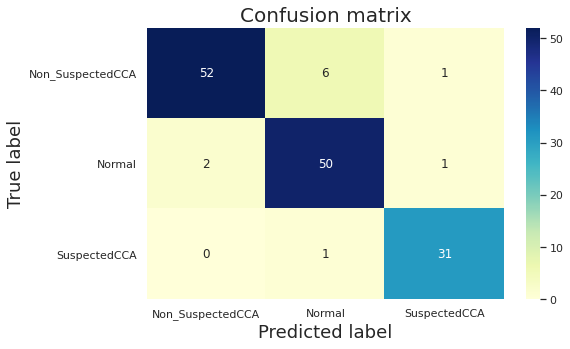

In [72]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)
print(cm)
#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)